In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sn

In [2]:
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm

In [3]:
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [4]:
df = pd.read_excel("D:\TCS INTERNSHIP\sampledatasets\Superstore.xls")
technology = df.loc[df['Category'] == 'Technology']

# 4 years of technology sales data

In [5]:
technology['Order Date'].min()

Timestamp('2014-01-06 00:00:00')

In [6]:
technology['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

# data preprocessing.

includes removal of unwanted coloumns and null values...aggregtae sales by date and so on... 

In [11]:
#cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
#technology=technology.drop(cols, axis=1, inplace=True)
technology = technology.sort_values('Order Date')

In [12]:
technology

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7478,7479,CA-2014-167199,2014-01-06,2014-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,...,42420,South,TEC-PH-10004539,Technology,Phones,Wireless Extenders zBoost YX545 SOHO Signal Bo...,755.960,4,0.0,204.1092
7477,7478,CA-2014-167199,2014-01-06,2014-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,...,42420,South,TEC-PH-10004977,Technology,Phones,GE 30524EE4,391.980,2,0.0,113.6742
593,594,CA-2014-135405,2014-01-09,2014-01-13,Standard Class,MS-17830,Melanie Seite,Consumer,United States,Laredo,...,78041,Central,TEC-AC-10001266,Technology,Accessories,Memorex Micro Travel Drive 8 GB,31.200,3,0.2,9.7500
765,766,CA-2014-162775,2014-01-13,2014-01-15,Second Class,CS-12250,Chris Selesnick,Corporate,United States,Bossier City,...,71111,South,TEC-AC-10003174,Technology,Accessories,Plantronics S12 Corded Telephone Headset System,646.740,6,0.0,258.6960
1913,1914,CA-2014-103366,2014-01-15,2014-01-17,First Class,EH-13990,Erica Hackney,Consumer,United States,Roswell,...,30076,South,TEC-AC-10003628,Technology,Accessories,Logitech 910-002974 M325 Wireless Mouse for We...,149.950,5,0.0,65.9780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4924,4925,CA-2017-114055,2017-12-25,2017-12-29,Second Class,MH-18115,Mick Hernandez,Home Office,United States,Huntsville,...,35810,South,TEC-PH-10002890,Technology,Phones,AT&T 17929 Lendline Telephone,90.480,2,0.0,23.5248
2569,2570,CA-2017-134404,2017-12-27,2017-12-27,Same Day,DR-12880,Dan Reichenbach,Corporate,United States,Newark,...,43055,East,TEC-PH-10000576,Technology,Phones,AT&T 1080 Corded phone,164.388,2,0.4,-35.6174
573,574,CA-2017-164826,2017-12-28,2018-01-04,Standard Class,JF-15415,Jennifer Ferguson,Consumer,United States,New York City,...,10024,East,TEC-PH-10000347,Technology,Phones,Cush Cases Heavy Duty Rugged Cover Case for Sa...,14.850,3,0.0,4.0095
1878,1879,CA-2017-118885,2017-12-29,2018-01-02,Standard Class,JG-15160,James Galang,Consumer,United States,Los Angeles,...,90049,West,TEC-PH-10002563,Technology,Phones,Adtran 1202752G1,302.376,3,0.2,22.6782


In [13]:
technology.isnull().sum()  #shows no null values

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [14]:
technology = technology.groupby('Order Date')['Sales'].sum().reset_index()

In [15]:
technology[technology["Sales"]==technology["Sales"].max()]

,Order Date,Sales
21,2014-03-18,24739.748


In [16]:
technology[technology["Sales"]==technology["Sales"].min()]

,Order Date,Sales
719,2017-08-13,1.584


In [17]:
technology.head(20)

,Order Date,Sales
0,2014-01-06,1147.94
1,2014-01-09,31.20
2,2014-01-13,646.74
3,2014-01-15,149.95
4,2014-01-16,124.20
5,2014-01-20,699.93
6,2014-01-26,343.33
7,2014-02-01,468.90
8,2014-02-02,180.96
9,2014-02-06,306.56


# Indexing with time series analysis

In [18]:
technology = technology.set_index('Order Date')
technology.index

DatetimeIndex(['2014-01-06', '2014-01-09', '2014-01-13', '2014-01-15',
               '2014-01-16', '2014-01-20', '2014-01-26', '2014-02-01',
               '2014-02-02', '2014-02-06',
               ...
               '2017-12-18', '2017-12-21', '2017-12-22', '2017-12-23',
               '2017-12-24', '2017-12-25', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=824, freq=None)

In [19]:
y = technology['Sales'].resample('MS').mean()

# lets glance at 2017 data...

In [20]:
y['2017':]

Order Date
2017-01-01    1195.218071
2017-02-01     430.501714
2017-03-01    1392.859250
2017-04-01     825.559133
2017-05-01     678.329400
2017-06-01     853.055000
2017-07-01    1054.996636
2017-08-01     978.842333
2017-09-01    1077.704120
2017-10-01    1493.439227
2017-11-01    1996.750920
2017-12-01     955.865652
Freq: MS, Name: Sales, dtype: float64

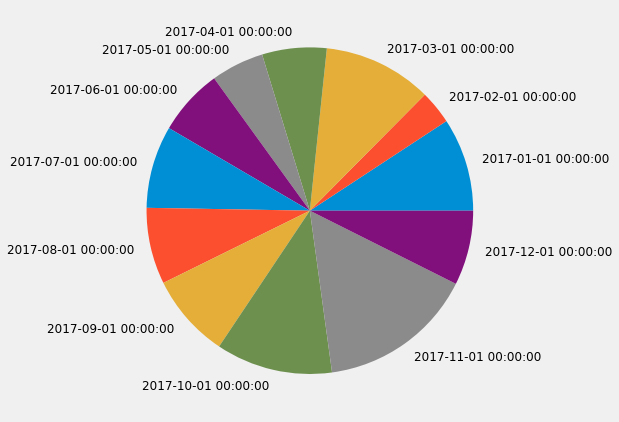

In [32]:
fig = plt.figure(figsize =(10, 7))
plt.pie(y['2017':],labels=y['2017':].index)
# show plot
plt.show()

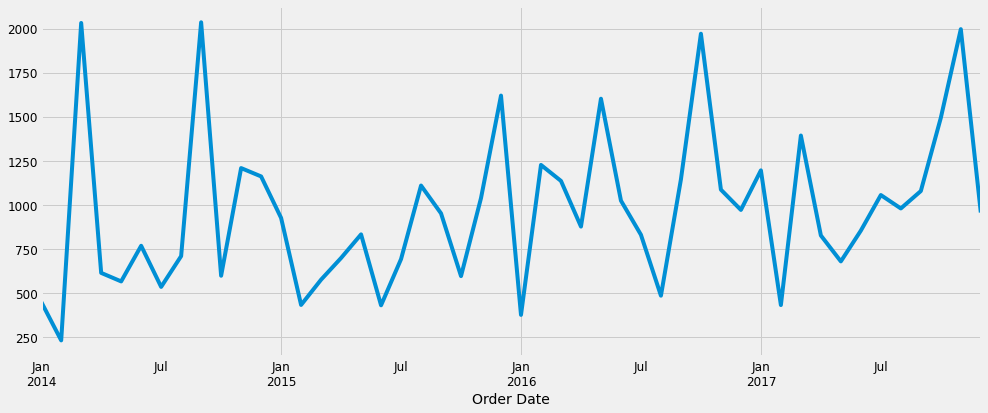

In [18]:
y.plot(figsize=(15, 6))
plt.show()

Some distinguishable patterns appear when we plot the data. The time-series has seasonality pattern, such as sales are increasing at the beginning of the year or at a bare low level,observes a downfard trend at the end of the year. There is not always a strong upward trend within any single year with a couple of low months in the mid of the year.

We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

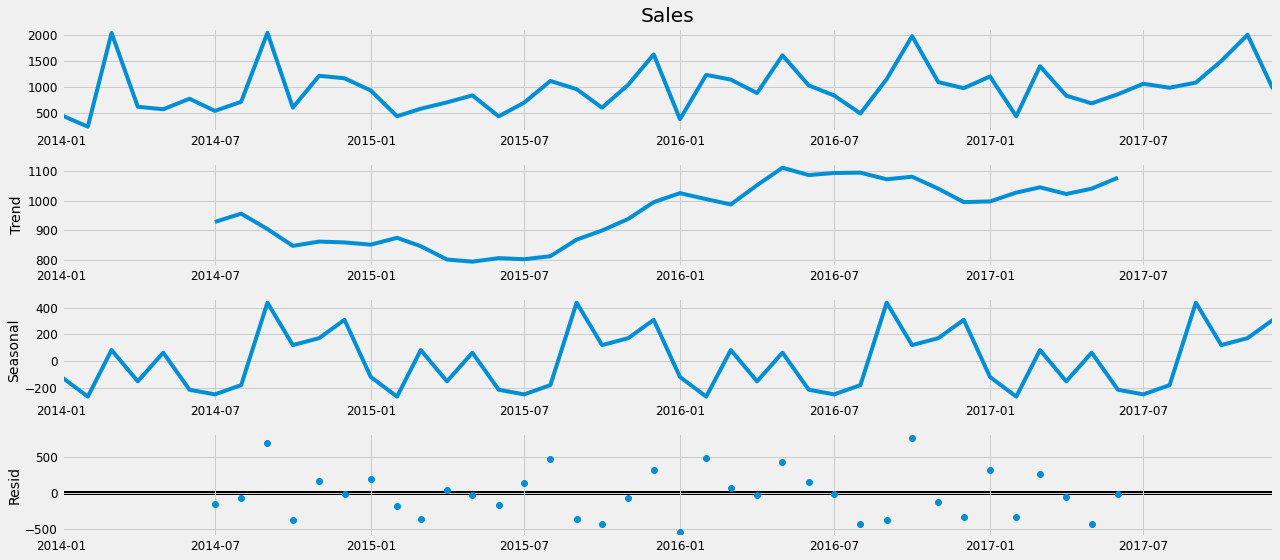

In [19]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

The plot above clearly shows that the sales of technology is unstable, along with its obvious seasonality.